<a href="https://www.kaggle.com/code/arsseniidonskov/car-price-model?scriptVersionId=222850407" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/car-price-dataset/car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
df.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
df.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

In [6]:
df.nunique()

Brand             10
Model             30
Year              24
Engine_Size       41
Fuel_Type          4
Transmission       3
Mileage         9854
Doors              4
Owner_Count        5
Price           6661
dtype: int64

In [7]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


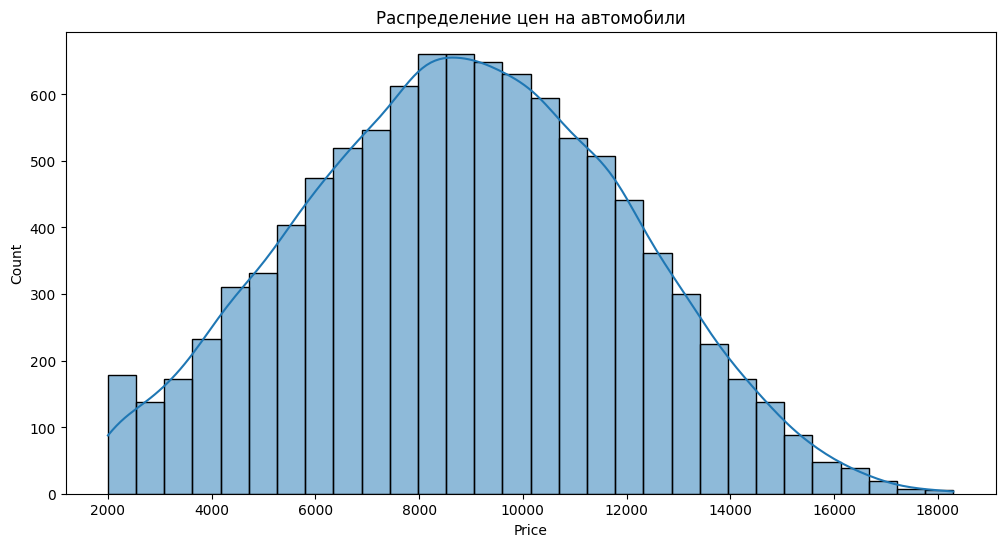

In [8]:
plt.figure(figsize=(12,6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Распределение цен на автомобили')
plt.show()

<Axes: xlabel='Mileage', ylabel='Price'>

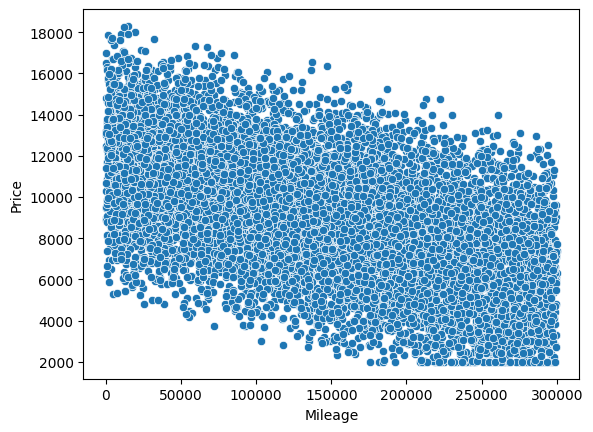

In [9]:
sns.scatterplot(x='Mileage', y='Price', data=df)

In [10]:
df.groupby('Brand')['Price'].mean().sort_values(ascending=False)

Brand
Chevrolet     9015.683948
Mercedes      8980.087049
Audi          8929.373796
Volkswagen    8928.377451
Kia           8880.086066
Ford          8852.570611
Toyota        8798.184536
Hyundai       8778.279397
BMW           8704.068068
Honda         8665.596630
Name: Price, dtype: float64

<Axes: title={'center': 'Топ 5 самых дорогих брендов'}, xlabel='Brand'>

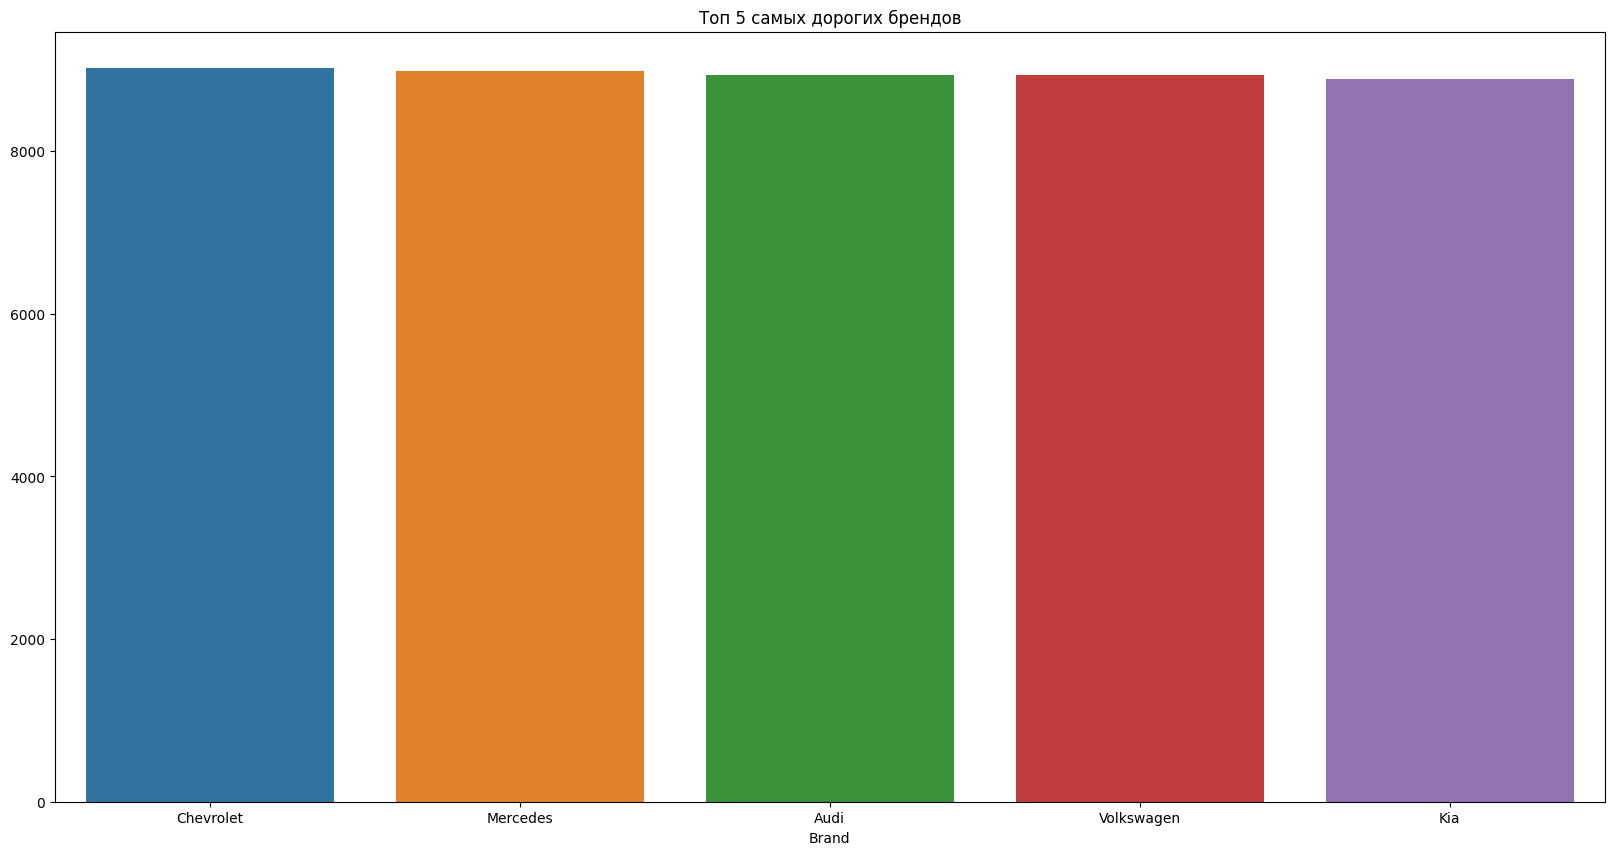

In [11]:
top_five_brands = df.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(20,10))
plt.title('Топ 5 самых дорогих брендов')
#plt.xlabel('Топ 5 брендов')
#plt.ylabel('Стоимость в тыс.$')
sns.barplot(x=top_five_brands.index, y=top_five_brands.values)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Model'] = le.fit_transform(df['Model'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,6,24,2020,4.2,0,1,289944,3,5,8501
1,2,19,2012,2.0,2,0,5356,2,3,12092
2,7,16,2020,4.2,0,0,231440,4,2,11171
3,0,22,2023,2.0,1,1,160971,2,1,11780
4,9,17,2003,2.6,2,2,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,6,20,2004,3.7,0,2,5794,2,4,8884
9996,2,18,2002,1.4,1,0,168000,2,1,6240
9997,1,0,2010,3.0,3,0,86664,5,1,9866
9998,3,13,2002,1.4,2,0,225772,4,1,4084


In [13]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [14]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# @title RandomForest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
RandomForestRegressor()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R²: {r2_score(y_test, y_pred)}')

accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

MAE: 651.0883175
MSE: 629802.4916976249
R²: 0.9357948893803377
Accuracy: 0.9357948893803377


In [16]:
# @title LinearRegression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R²: {r2_score(y_test, y_pred)}')

accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


MAE: 797.8763189984099
MSE: 818949.1835471871
R²: 0.9165123612328072
Accuracy: 0.9165123612328072


In [17]:

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
feature_importance

,Feature,Coefficient
3,Engine_Size,968.112509
2,Year,297.054382
8,Owner_Count,26.471327
1,Model,0.372963
6,Mileage,-0.019853
7,Doors,-1.077221
0,Brand,-7.268928
4,Fuel_Type,-95.970517
5,Transmission,-683.197514


In [18]:
# @title Gipotes

#Зависит ли цена автомобиля от типа топлива?

cor_fuel_front_price = df['Fuel_Type'].corr(df['Price'])
cor_fuel_front_price

#Ответ корреляция признаков является очень слабой, что подразумевает под собой почти полную независимость Типа топлива автомобиля от его цены

-0.037178334505015904